In [1]:
%matplotlib inline
import tensorflow as tf

In [2]:
import helper

In [43]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" #for training on gpu

In [15]:
images, labels, names = helper.load_pickle('dataset/grayscale/training')
test_images, test_labels, test_names = helper.load_pickle('dataset/grayscale/test')

In [16]:
images.shape

(46371, 100, 100)

# Sample image show

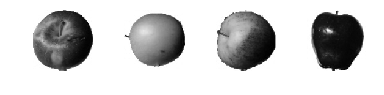

In [19]:
import matplotlib.pyplot as plt

im = [300, 2250, 3650, 4000]

for i in range(len(im)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[im[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

# Tensorflow

In [38]:
# Initialize placeholders 
x = tf.placeholder(dtype = tf.float32, shape = [None, 100, 100])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 90, tf.nn.sigmoid)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [39]:
print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_2/flatten/Reshape:0", shape=(?, 10000), dtype=float32)
logits:  Tensor("fully_connected_2/Sigmoid:0", shape=(?, 90), dtype=float32)
loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_2:0", shape=(?,), dtype=int64)


In [40]:
tf.set_random_seed(1234)
sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(201):
        _, accuracy_val = sess.run([train_op, accuracy], feed_dict={x: images, y: labels})
        if i % 10 == 0:
            print("Loss: ", loss)

Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape=(), dtype=float32)
Loss:  Tensor("Mean_4:0", shape

[24, 86, 23, 61, 45, 31, 31, 39, 55, 32]
[23 23 22 22 22 22 22 22 22 23]


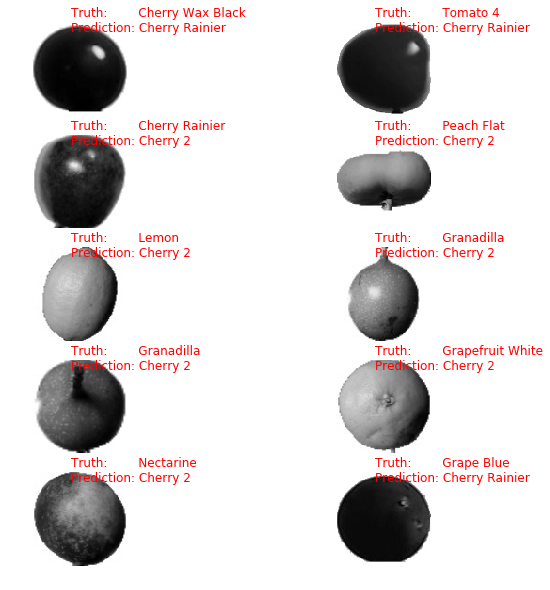

In [41]:
import random

# Pick 10 random images
sample_indexes = random.sample(range(len(images)), 10)
sample_images = [images[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "correct_pred" operation
predicted = sess.run([correct_pred], feed_dict={x: sample_images})[0]
                        
# Print the real and predicted labels
print(sample_labels)
print(predicted)

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = names[sample_labels[i]]
    prediction = names[predicted[i]]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i],  cmap="gray")

plt.show()

In [42]:
# Run predictions against the full test set.
predicted = sess.run([correct_pred], feed_dict={x: test_images})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.016
